## DSC 180AB Data Science Capstone
### Replication Project

Team Members: Stephanie Chavez, Benjamin Chen, Sam Horio, Jayson Leach, Natalie Wu

### Table of Contents
To return to the table of contents, click on the number at any major section heading.

[1. Introduction](#1.-Introduction)

[2. Exploratory Data Analysis](#2.-Exploratory-Data-Analysis)

[3. Model Development](#3.-Model-Development)

[4. Model Evaluation](#4.-Model-Evaluation)

[5. Bias Mitigation](#5.-Bias-Mitigation)

[6. Results Summary](#6.-Results-Summary)

[7. Explainability](#7.-Explainability)

[8. Conclusion & Discussion](#8.-Conclusion-&-Discussion)


## This tutorial demonstrates classification model learning with bias mitigation as a part of a Care Management use case using Medical Expenditure data.

The notebook demonstrates how the AIF 360 toolkit can be used to detect and reduce bias when learning classifiers using a variety of fairness metrics and algorithms . It also demonstrates how explanations can be generated for predictions made by models learnt with the toolkit using LIME.

* Classifiers are built using Logistic Regression as well as Random Forests.
* Bias detection is demonstrated using several metrics, including disparate impact, average odds difference, statistical parity difference, equal opportunity difference, and Theil index.
* Bias alleviation is explored via a variety of methods, including reweighing (pre-processing algorithm), prejudice remover (in-processing algorithm), and disparate impact remover (pre-processing technique).
* Data from the [Medical Expenditure Panel Survey](https://urldefense.com/v3/__https://meps.ahrq.gov/mepsweb/__;!!Mih3wA!BOEOztl97chVva97r53aT50dEFwNxxI2GkzmaN6Ka1BWLdgKKh2LJXrxTrJ7odgsEuyLI8wAkAntFYG1ghc$ ) is used in this tutorial.


The Medical Expenditure Panel Survey (MEPS) provides nationally representative estimates of health expenditure, utilization, payment sources, health status, and health insurance coverage among the noninstitutionalized U.S. population. These government-produced data sets examine how people use the US healthcare system.

MEPS is administered by the Agency for Healthcare Research and Quality (AHRQ) and is divided into three components: 
* Household
* Insurance/Employer, and 
* Medical Provider. 

These components provide comprehensive national estimates of health care use and payment by individuals, families, and any other demographic group of interest.

### Abstract
The increasing integration of AI across various domains raises important questions about its potential biases and equitable treatment of different groups. These issues revolve around the quality of data and the concept of algorithmic fairness. However, addressing these concerns cannot rely solely on legal or government regulations; it demands a comprehensive examination at the confluence of ethics and technical expertise. Therefore, it is crucial to dedicate thoughtful consideration to the detection and mitigation of bias and fairness issues throughout the entire machine learning model life cycle.

In this research, we use the Medical Expenditure Panel Survey dataset to investigate the detection and mitigation of racial bias in a medical care management scenario, employing the IBM AI Fairness 360 toolkit. Our ultimate goal is to provide valuable insights and tools to data science practitioners and the communities affected by these biases, facilitating the promotion of AI fairness and transparency.

### [1.](#Table-of-Contents) Introduction

The [AI Fairness 360 toolkit](https://urldefense.com/v3/__https://github.com/Trusted-AI/AIF360__;!!Mih3wA!BOEOztl97chVva97r53aT50dEFwNxxI2GkzmaN6Ka1BWLdgKKh2LJXrxTrJ7odgsEuyLI8wAkAntlAxz2VI$ ) is an extensible open-source library containing techniques developed by the research community to help detect and mitigate bias in machine learning models throughout the AI application lifecycle. AI Fairness 360 package is available in both Python and R. Documentation is available [here](https://urldefense.com/v3/__https://aif360.readthedocs.io/en/v0.2.3/index.html)*5Cn__;JQ!!Mih3wA!BOEOztl97chVva97r53aT50dEFwNxxI2GkzmaN6Ka1BWLdgKKh2LJXrxTrJ7odgsEuyLI8wAkAntKVyrvtU$ 
The AI Fairness 360 package includes: 
- a comprehensive set of metrics for datasets and models to test for biases,
- explanations for these metrics, and
- algorithms to mitigate bias in datasets and models
It is designed to translate algorithmic research from the lab into the actual practice of domains as wide-ranging as finance, human capital management, healthcare, and education

As machine learning becomes more prevalent in the coming years, there are many ethical considerations to take into account when building models that affect the real world. For AI to be considered ethically fair, it requires evaluation of how representative the data being used to train these algorithms is of the population and if it contains sensitive information about individuals that should be safeguarded to prevent discriminatory treatment, i.e., protected attributes. Additionally, when the algorithms use this data, it’s important to examine if they make different types of errors across certain groups and whether or not they’re disparately accurate for certain groups. To be more precise, we want to observe if the algorithm predicts outcomes better for one group than for another, as well as if it produces differing false positive or false negative rates for certain groups. With the intent to enable equity across all participants, we aim to improve the bias detection within AI systems and mitigate them through algorithmic means.

#### 1.1 Use Case

**In order to demonstrate how AIF360 can be used to detect and mitigate bias in classfier models, we adopt the following use case:**

* Data scientist develops a 'fair' healthcare utilization scoring model with respect to defined protected classes. Fairness may be dictated by legal or government regulations, such as a requirement that additional care decisions be not predicated on factors such as race of the patient.
* Developer takes the model AND performance characteristics / specs of the model (e.g. accuracy, fairness tests, etc. basically the model factsheet) and deploys the model in an enterprise app that prioritizes cases for care management.
* The app is put into production and starts scoring people and making recommendations. 
* Explanations are generated for each recommendation
* Both recommendations and associated explanations are given to nurses as a part of the care management process. The nurses can evaluate the recommendations for quality and correctness and provide feedback.
* Nurse feedback as well as analysis of usage data with respect to specs of the model w.r.t accuracy and fairness is communicated to AI Ops specialist and LOB user periodically.
* When significant drift in model specs relative to the model factsheet is observed, the model is sent back for retraining.

#### 1.2 Literature Review & Prior Work
With the rise of artificial intelligence brings a growing concern with its application in the public health sphere. Historical and systemic prejudices, along with a lack of representation in the data collection processes have bred empirical evidence that support these concerns1. Ethical considerations in AI necessitate representative population samples in research, mirroring the diversity of the demographics they aim to depict. 

For instance, health sector research frequently highlights data on traditionally marginalized groups, such as the Black and Hispanic communities, yet tends to overlook indigenous Native American populations. In the United States, Native Americans exhibit the lowest life expectancy among all racial or ethnic groups. They faced the highest COVID-19 infection rates, yet received disproportionately lower healthcare support, as evidenced by the stark decline in life expectancy from the average 71.8 to 65.2 years between 2019 and 20212. The skewed distribution of health surveys, which often omit critical segments of the population, introduces systemic bias. This in turn may result in recommendations that fail to address the true needs of these communities. For the purpose of this paper, bias mitigation could be approached through transparent sampling methods and the application of data preprocessing techniques.

Furthermore, informed consent and transparency are crucial in gathering and processing sensitive data. A lack of clarity regarding the use and extent of data application can foster distrust in AI, particularly affecting research participation rates. This aspect is particularly notable among the most vulnerable groups, who may be hesitant to share their data due to historical mistreatment by the medical industrial complex. Black women, who disproportionately suffer from pregnancy-related mortality—a rate 2.6 times higher than that of their white counterparts—are historically subjected to medical experimentation and stereotypes regarding pain tolerance3. Addressing these deeply ingrained systemic issues yields a growing need towards robust transparency and the implementation of clear, comprehensible informed consent processes. Enhancing understanding through the use of plain language explanations of data use and AI algorithmic functions could foster more trust and accessibility.

Regarding findings on the disparities between insurance, income, and racial/ethnicity and how they affect children’s usual source of care, people in high-income families were significantly less likely than any income group to lack a usual source of healthcare. Although these numbers have decreased since, there has only been a 1.1% decrease in US children without usual healthcare between 2004 and 20144. Although factors such as ethnicity, race, and income may not appear to directly affect all young adolescents, the insurance and subsequent health care these children receive are often reflective of the system they were brought up in. Thus, contextualizing the issue and/or concern, being inclusive of the population sample, and opening up a broader conversation as to better educating vulnerable populations can lead to a potentially beneficial and revitalized healthcare system.

When conducting data analysis on our dataset, it is imperative to prioritize diversity, equity, and inclusion when determining the integrity and relevance of prior work and domain research, particularly within the scope of public health. Prior research must be meticulously scrutinized for its domain knowledge in DEI in order to identify latent biases stemming from the inclusion and the omission of diverse populations in the data collection process. Contextual awareness allows for a more nuanced understanding of the data, and in turn fosters the development of AI systems that are truly inclusive and equitable. The integration of DEI expertise in AI research is not optional but a necessary criterion for ethical rigor, societal relevance, and the future of medical scientific research. Thus, we aim to provide a classification model that accounts for sensitive features that may impact an individual's ability to access additional healthcare. The pursuit of comprehensive inclusivity in data—both in collection and analysis—stands as a beacon for the advancement of a healthcare paradigm that is equitable and universally beneficial.

#### Citations
Dwork, Cynthia, and Martha Minow. “Distrust of Artificial Intelligence: Sources & Responses from Computer Science & Law.” Daedalus, vol. 151, no. 2, 2022, pp. 309–21. JSTOR, https://www.jstor.org/stable/48662044. Accessed 4 Nov. 2023.

Leggat-Barr, Katherine, et al. “COVID-19 Risk Factors and Mortality among Native Americans.” Demographic Research, vol. 45, 2021, pp. 1185–218. JSTOR, https://www.jstor.org/stable/48640810. Accessed 4 Nov. 2023.

Njoku, Anuli et al. “Listen to the Whispers before They Become Screams: Addressing Black Maternal Morbidity and Mortality in the United States.” Healthcare (Basel, Switzerland) vol. 11,3 438. 3 Feb. 2023, doi:10.3390/healthcare11030438

Naomi Zewde, PhD and Terceira Berdahl, PhD. 
“Children's Usual Source of Care: Insurance, Income, and Racial/Ethnic Disparities.” Medical Expenditure Panel Survey, Statistical brief #501. Agency for Healthcare Research and Quality, https://meps.ahrq.gov/data_files/publications/st501/stat501.pdf. Accessed 5 Nov. 2023.

#### 1.3 Description of Relevant Data
For this replication project, we’re focusing on the Medical Expenditure Panel Survey (MEPS) for years 2015 to 2016, a government-produced dataset that examines how people use the U.S. healthcare system and such is organized into three components: (1) household, (2) insurance/employer, and (3) medical provider. This dataset provides comprehensive estimates of health care use and payment based on a nationally representative sample of the civilian noninstitutionalized population of the United States. Such data is suitable for the investigation of detecting and mitigating racial bias in a medical care management scenario as the MEPS contains large diverse/representative data, detailed information on healthcare with a variety of features, and longitudinal data collected over multiple years. This allows for a comprehensive examination of racial disparities and bias in healthcare over time, and statistically robust results. However, the said dataset could be less useful for more specific analyses, such as racially/ethnically subgroups or geographically, and could suffer from a time lag, which affects the generalization and timeliness of the research.on evolving healthcare disparities and data.

The specific data being used is the 2015 Full Year Consolidated Data File (i.e. MEPS HC-181) and the 2016 Full Year Consolidated Data File (i.e. MEPS HC-192). In the 2015 file, the MEPS survey data obtained in rounds 3, 4, and 5 of panel 19 (2014) and rounds 1, 2, and 3 of panel 20 (2015). The 2016 file consists of data from rounds 3, 4, and 5 of panel 20 (2015) and rounds 1, 2, 3 of panel 21 (2016). Both contain all the final 2015 person-level variables, including survey administration, language of interview variable, demographics, parent identifiers, health status, disability days variables, access to care, employment, quality of care, patient satisfaction, health insurance, use variables, income variables, and expenditure variables– which were previously released on the HC-174 and HC-181 files. For our research, three datasets were constructed for different stages of building the model. Panel 19, round 5 was used for learning the model; panel 20, round 3 was used for deployment/testing the model’s steps; panel 21, round 3 was used for retraining and deployment/testing of the updated model.

Using MEPS, specifically the household component, we want to build a “fair” healthcare utilization scoring model to determine if a person is high-utilizer of medical care and therefore, needs additional care. The classification model uses race as the sensitive feature, i.e., protected attribute, and to identify these potential candidates.For each dataset, the sensitive attribute ‘RACE’ was constructed so that ‘Whites’ (privileged class) was defined by RACEV2X = 1 (White) and HISPANX = 2 (non-Hispanic), and ‘Non-Whites’ included all other individuals. In addition to race, the model utilized other features, including demographics (e.g. race, age, gender, active-duty status), physical/mental health assessments, diagnosis codes (e.g. history of diagnosis of cancer, or diabetes), and limitations (e.g. cognitive or hearing or vision limitation). 

In order to measure utilization, we create the feature ‘UTILIZATION,’ which measures the total number of trips requiring medical care, by summing the features: OBTOTV15(16), the number of office based visits; OPTOTV15(16), the number of outpatient visits; ERTOT15(16), the number of ER visits; IPNGTD15(16), the number of inpatient nights, and + HHTOTD16. If UTILIZATION >= 10, around the average utilization for the population, the person is considered ‘high’ utilization, which is what the classification model aims to predict. Each dataset consisted of around 17% high utilization respondents. For this medical care management scenario, each dataset is split into three parts: a train, a validation, and a test set. The classification model is initially built and tuned using the 2015 panel 19 train/test test, with the initial deployment being simulated to the 2015 panel 20 deployment data. Then, using the 2016 panel 21 deployment data, we observe change in performance and/or fairness over time; if there’s a shift, we use the 2015 train/validation to learn a new model and evaluate it again on the 2016 deployment data.

#### 1.4 Methodology 

For each dataset, the sensitive attribute is 'RACE' constructed as follows: 'Whites' (privileged class) defined by the features RACEV2X = 1 (White) and HISPANX = 2 (non Hispanic); 'Non-Whites' that included everyone else.  

* Along with race as the sensitive feature, other features used for modeling include demographics  (such as age, gender, active duty status), physical/mental health assessments, diagnosis codes (such as history of diagnosis of cancer, or diabetes), and limitations (such as cognitive or hearing or vision limitation).
* To measure utilization, a composite feature, 'UTILIZATION', was created to measure the total number of trips requiring some sort of medical care by summing up the following features: OBTOTV15(16), the number of office based visits;  OPTOTV15(16), the number of outpatient visits; ERTOT15(16), the number of ER visits;  IPNGTD15(16), the number of inpatient nights, and  + HHTOTD16, the number of home health visits.
* The model classification task is to predict whether a person would have 'high' utilization (defined as UTILIZATION >= 10, roughly the average utilization for the considered population). High utilization respondents constituted around 17% of each dataset.
* To simulate the scenario, each dataset is split into 3 parts: a train, a validation, and a test/deployment part.

**We assume that the model is initially built and tuned using the 2015 Panel 19 train/test data**
* It is then put into practice and used to score people to identify potential candidates for care management. 
* Initial deployment is simulated to 2015 Panel 20 deployment data. 
* To show change in performance and/or fairness over time, the 2016 Panel 21 deployment data is used. 
* Finally, if drift is observed, the 2015 train/validation data is used to learn a new model and evaluated again on the 2016 deployment data

### 1.5 Insert writeup of overall replication project goals and big picture thinking (2-3 paragraphs).  
* Why do we care about this? 
* What would the benefit of predicting utilization be? 
* What might occur if there are errors?
* Who are the affected parties and stakeholders?
* Other thoughts?

**Write up here:**

---
End of Introduction

### [2.](#Table-of-Contents) Exploratory Data Analysis (EDA)


The specific data used is the [2015 Full Year Consolidated Data File](https://urldefense.com/v3/__https://meps.ahrq.gov/mepsweb/data_stats/download_data_files_detail.jsp?cboPufNumber=HC-181__;!!Mih3wA!BOEOztl97chVva97r53aT50dEFwNxxI2GkzmaN6Ka1BWLdgKKh2LJXrxTrJ7odgsEuyLI8wAkAnt6P5AG7M$ ) as well as the [2016 Full Year Consolidated Data File](https://urldefense.com/v3/__https://meps.ahrq.gov/mepsweb/data_stats/download_data_files_detail.jsp?cboPufNumber=HC-192).*5Cn__;JQ!!Mih3wA!BOEOztl97chVva97r53aT50dEFwNxxI2GkzmaN6Ka1BWLdgKKh2LJXrxTrJ7odgsEuyLI8wAkAntl5zrAwQ$ 
* The 2015 file contains data from rounds 3,4,5 of panel 19 (2014) and rounds 1,2,3 of panel 20 (2015). 
* The 2016 file contains data from rounds 3,4,5 of panel 20 (2015) and rounds 1,2,3 of panel 21 (2016).

In this example, three datasets were constructed: one from panel 19, round 5 (used for learning models), one from panel 20, round 3 (used for deployment/testing of model - steps); the other from panel 21, round 3 (used for re-training and deployment/testing of updated model).

See the corresponding [Codebook](https://urldefense.com/v3/__https://meps.ahrq.gov/mepsweb/data_stats/download_data_files_detail.jsp?cboPufNumber=HC-181__;!!Mih3wA!BOEOztl97chVva97r53aT50dEFwNxxI2GkzmaN6Ka1BWLdgKKh2LJXrxTrJ7odgsEuyLI8wAkAnt6P5AG7M$ ) for information on variables.

##### Key MEPS dataset features include:
* **Utilization**: To measure utilization, a composite feature, 'UTILIZATION', was created to measure the total number of trips requiring some sort of medical care by summing up the following features: OBTOTV15(16), the number of office based visits;  OPTOTV15(16), the number of outpatient visits; ERTOT15(16), the number of ER visits;  IPNGTD15(16), the number of inpatient nights, and  + HHTOTD16, the number of home health visits.
* The model classification task is to predict whether a person would have **'high'** utilization (defined as UTILIZATION >= 10, roughly the average utilization for the considered population). High utilization respondents constituted around 17% of each dataset.

#### 2.0 Pre-processing Scripts (for each Panel)

There is currently minimal EDA for this tutorial within IBM AIF360 Medical Expenditure Tutorial. Therefore, we have adapted  utility scripts from IBM AIF360 Tutorial for ease of understanding for how datasets were pre-processed. These will be used primarily for EDA purposes. We will utilize IBM's tutorial for the remainder of the project. We have utilized Pandas for this portion of the project. 

**Note:** these pre-processing script below are run for each data file, and then filtered for each panel. This was done in order to match subsequent portions of the tutorial, and how train/test/validation datasets were split.

#### 2.1 Get and Load Dataset, Apply Pre-processing

In [1]:
%%capture output
# silence aif warnings

# Imports
import sys

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Markdown, display
import pandas as pd
import seaborn as sns

# Datasets
from aif360.datasets import MEPSDataset19
from aif360.datasets import MEPSDataset20
from aif360.datasets import MEPSDataset21

# Fairness metrics
from aif360.metrics import BinaryLabelDatasetMetric
from aif360.metrics import ClassificationMetric

from sklearn.pipeline import make_pipeline

# import processing function(s)
from pre_processing import pre_processing

In [2]:
raw_181 = pd.read_csv('data/h181.csv')

#### Apply pre-processing scripts

In [3]:
default_mappings = {
    'label_maps': [{1.0: '>= 10 Visits', 0.0: '< 10 Visits'}],
    'protected_attribute_maps': [{1.0: 'White', 0.0: 'Non-White'}]}

##### Taken from pre-processing scripts to retain same columns used in model development for tutorial

In [4]:
# idk what this section is useful for
label_name='UTILIZATION'
favorable_classes=[1.0]
protected_attribute_names=['RACE']
privileged_classes=[['White']]
instance_weights_name='PERWT15F'
categorical_features=['REGION','SEX','MARRY',
                                 'FTSTU','ACTDTY','HONRDC','RTHLTH','MNHLTH','HIBPDX','CHDDX','ANGIDX',
                                 'MIDX','OHRTDX','STRKDX','EMPHDX','CHBRON','CHOLDX','CANCERDX','DIABDX',
                                 'JTPAIN','ARTHDX','ARTHTYPE','ASTHDX','ADHDADDX','PREGNT','WLKLIM',
                                 'ACTLIM','SOCLIM','COGLIM','DFHEAR42','DFSEE42', 'ADSMOK42', 'PHQ242',
                                 'EMPST','POVCAT','INSCOV']

features_to_drop=[]
na_values=[]
# custom_preprocessing=default_preprocessing <- don't need this yet for EDA
metadata=default_mappings

In [5]:
df_panel_19 = pre_processing(raw_181, 19)
df_panel_19_reduced = df_panel_19.copy()

In [6]:
df_panel_20 =pre_processing(raw_181, 20)
df_panel_20_reduced = df_panel_20.copy()

#### 2.2 Data shape and features

In [7]:
# Identify feature names
# Check for categorical features
feat = ['REGION','AGE','SEX','RACE','MARRY',
                                 'FTSTU','ACTDTY','HONRDC','RTHLTH','MNHLTH','HIBPDX','CHDDX','ANGIDX',
                                 'MIDX','OHRTDX','STRKDX','EMPHDX','CHBRON','CHOLDX','CANCERDX','DIABDX',
                                 'JTPAIN','ARTHDX','ARTHTYPE','ASTHDX','ADHDADDX','PREGNT','WLKLIM',
                                 'ACTLIM','SOCLIM','COGLIM','DFHEAR42','DFSEE42', 'ADSMOK42',
                                 'PCS42','MCS42','K6SUM42','PHQ242','EMPST','POVCAT','INSCOV','UTILIZATION', 'PERWT15F']
d = [['Region', 'Categorical'], ['Age', 'Numerical'], ['Sex', 'Categorical'], ['Race', 'Categorical'],
     ['Marital Status', 'Categorical'], ['Student Status', 'Categorical'], ['Military Status', 'Categorical'],
     ['Honorable Discharge Status', 'Categorical'], ['Percieved Health Status', 'Categorical'],
     ['Mental Health Status', 'Categorical'], ['High Blood Pressure Diagnosis', 'Categorical'],
     ['Coronary Heart Disease Diagnosis', 'Categorical'], ['Angina Diagnosis', 'Categorical'],
     ['Heart Attack (MI) Diagnosis', 'Categorical'], ['Other Heart Disease Diagnosis', 'Categorical'],
     ['Stroke Diagnosis', 'Categorical'], ['Emphysema Diagnosis', 'Categorical'],
     ['Chronic Bronchitis (> 12 Months) Diagnosis', 'Categorical'], ['High Cholesterol Diagnosis', 'Categorical'],
     ['Cancer Diagnosis', 'Categorical'], ['Diabetes Diagnosis', 'Categorical'],
     ['Joint Pain (> 12 Months) Diagnosis', 'Categorical'], ['Arthritis Diagnosis', 'Categorical'],
     ['Arthritis Type', 'Categorical'], ['Asthma Diagnosis', 'Categorical'], ['ADHD ADD Diagnois', 'Categorical'],
     ['Pregnancy Status', 'Categorical'], ['Limitation in Physical Activity', 'Categorical'],
     ['Limitation in Work, Housework, School', 'Categorical'], ['Social Limitations', 'Categorical'],
     ['Cognitive Limitations', 'Categorical'], ['Serious Difficulty Hearing', 'Categorical'],
     ['Serious Difficulty Seeing with Glasses', 'Categorical'], ['Currently Smoke', 'Categorical'],
     ['Physical Component Summary', 'Numerical'], ['Mental Component Summary', 'Numerical'],
     ['Overall Rating of Feelings 30 Days', 'Categorical'], ['Overall Rating of Feelings 2 Weeks', 'Categorical'],
     ['Employment Status', 'Categorical'], ['Family Income as Percent of Poverty Line', 'Categorical'],
     ['Health Insurance Coverage', 'Categorical'], ['Utilization Based on Number of Trips', 'Categorical'],
     ['Final Person Statistical Weight', 'Numerical']]
feature_key = pd.DataFrame(data=d, index=feat, columns = ['Description', 'Data Type'])
feature_key

,Description,Data Type
REGION,Region,Categorical
AGE,Age,Numerical
SEX,Sex,Categorical
RACE,Race,Categorical
MARRY,Marital Status,Categorical
FTSTU,Student Status,Categorical
ACTDTY,Military Status,Categorical
HONRDC,Honorable Discharge Status,Categorical
RTHLTH,Percieved Health Status,Categorical
MNHLTH,Mental Health Status,Categorical


In [8]:
df_panel_19_reduced.describe().T

,count,mean,std,min,25%,50%,75%,max
REGION,15830.0,2.825584,1.002033,1.0,2.000000,3.000000,4.000000,4.000000
AGE,15830.0,35.090461,22.475549,0.0,15.000000,33.000000,53.000000,85.000000
SEX,15830.0,1.521162,0.499568,1.0,1.000000,2.000000,2.000000,2.000000
MARRY,15830.0,3.661213,2.121255,1.0,1.000000,5.000000,6.000000,10.000000
FTSTU,15830.0,-0.720088,0.910025,-1.0,-1.000000,-1.000000,-1.000000,3.000000
ACTDTY,15830.0,2.581364,0.758747,1.0,2.000000,2.000000,3.000000,4.000000
HONRDC,15830.0,2.224889,0.512242,1.0,2.000000,2.000000,3.000000,4.000000
RTHLTH,15830.0,2.187871,1.054677,-1.0,1.000000,2.000000,3.000000,5.000000
MNHLTH,15830.0,1.993051,1.002657,-1.0,1.000000,2.000000,3.000000,5.000000
HIBPDX,15830.0,0.918067,1.267763,-1.0,-1.000000,1.000000,2.000000,2.000000


In [9]:
df_panel_20_reduced.describe().T

,count,mean,std,min,25%,50%,75%,max
REGION,17570.0,2.778201,1.016363,1.0,2.000000,3.000000,4.00000,4.000000
AGE,17570.0,35.396187,22.662113,0.0,15.000000,34.000000,53.00000,85.000000
SEX,17570.0,1.519465,0.499635,1.0,1.000000,2.000000,2.00000,2.000000
MARRY,17570.0,3.626010,2.148104,1.0,1.000000,5.000000,6.00000,10.000000
FTSTU,17570.0,-0.718668,0.908419,-1.0,-1.000000,-1.000000,-1.00000,3.000000
ACTDTY,17570.0,2.594764,0.767781,1.0,2.000000,2.000000,3.00000,4.000000
HONRDC,17570.0,2.223734,0.518731,1.0,2.000000,2.000000,3.00000,4.000000
RTHLTH,17570.0,2.167103,1.084599,-1.0,1.000000,2.000000,3.00000,5.000000
MNHLTH,17570.0,1.942971,1.012665,-1.0,1.000000,2.000000,3.00000,5.000000
HIBPDX,17570.0,0.922595,1.268244,-1.0,-1.000000,1.000000,2.00000,2.000000


In [10]:
# Shapes
df_panel_19_reduced.shape, df_panel_20_reduced.shape

((15830, 43), (17570, 43))

#### 2.3 Outlier Detection and Handling

In [11]:
# # Null handling

In [12]:
# handle -9 which is null value in columns PCS42, MCS42, K6SUM42
df_panel_19_reduced = df_panel_19_reduced[(df_panel_19_reduced['PCS42'] != -9)
                        & (df_panel_19_reduced['MCS42'] != -9) & (df_panel_19_reduced['K6SUM42'] != -9)]
df_panel_20_reduced = df_panel_20_reduced[(df_panel_20_reduced['PCS42'] != -9)
                        & (df_panel_20_reduced['MCS42'] != -9) & (df_panel_20_reduced['K6SUM42'] != -9)]

In [13]:
# only numerical can have outliers
feature_key[feature_key['Data Type'] == 'Numerical'] 

,Description,Data Type
AGE,Age,Numerical
PCS42,Physical Component Summary,Numerical
MCS42,Mental Component Summary,Numerical
PERWT15F,Final Person Statistical Weight,Numerical


PCS42, MCS42, PERWT15F are difficult to consider as outliers - as such, we will leave them as is. This leaves us with investigating AGE.

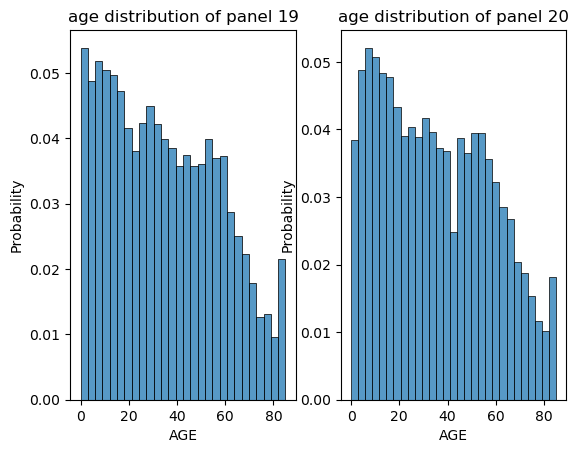

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2)
sns.histplot(df_panel_19_reduced['AGE'], stat = "probability", ax = ax1)
sns.histplot(df_panel_20_reduced['AGE'], stat = "probability", ax = ax2)
ax1.set_title('age distribution of panel 19')
ax2.set_title('age distribution of panel 20')
plt.show()

There's a concerning number of ages that are less than 18, which is rather unexpected. The age of consent is 18, meaning that we'd expect the minimum age to be 18 for someone to participate in this study.

In [15]:
df_panel_19_reduced[df_panel_19_reduced['AGE'] < 18]['AGE'].value_counts()

13    281
10    274
6     272
8     271
9     270
7     268
14    265
5     263
11    258
12    255
17    250
16    248
3     232
15    231
4     227
1     220
2     209
0     180
Name: AGE, dtype: int64

In [16]:
df_panel_20_reduced[df_panel_20_reduced['AGE'] < 18]['AGE'].value_counts()

14    319
6     319
9     307
8     306
16    297
10    294
3     292
11    278
5     277
7     277
4     275
15    272
13    261
12    258
17    257
2     240
1     239
0     186
Name: AGE, dtype: int64

There's a large proportion of observations in the data on people less than 18, which is concerning as the legal age of consent is 18. A bit of research tells us that MEPS collects data on people as young as 10 - so let's use that as our floor for age. We will consider all observations with an age less than 10 as outliers.

In [17]:
# floor age // discard observations with an age less than the cut off
age_cutoff = 10
df_panel_19_reduced = df_panel_19_reduced[df_panel_19_reduced['AGE'] >= age_cutoff]
df_panel_20_reduced = df_panel_20_reduced[df_panel_20_reduced['AGE'] >= age_cutoff]

We can see that the highest age in the distribution is about 85 - though this is well above the mean of around 35 between both panels, we choose to retain it as (reasonably) large ages is an important phenomena to retain as older people likely have to use health services more.

In [18]:
# Shapes after removing nulls and providing cutoffs
df_panel_19_reduced.shape, df_panel_20_reduced.shape

((13197, 43), (14594, 43))

#### 2.4 Correlation Analysis

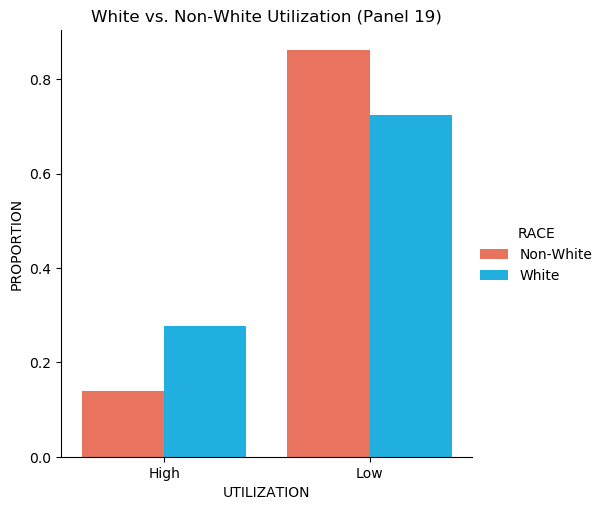

In [19]:
# identified disparity in occurance of high utilization with categories of race
non_white_counts = df_panel_19_reduced[df_panel_19_reduced['RACE'] == 'Non-White']['UTILIZATION'].value_counts()
white_counts = df_panel_19_reduced[df_panel_19_reduced['RACE'] != 'Non-White']['UTILIZATION'].value_counts()

# data preparation
util_data_1 = df_panel_19_reduced.copy()[['RACE', 'UTILIZATION', 'AGE']].rename(columns={'AGE': 'COUNT'})
util_data_1['UTILIZATION'] = util_data_1['UTILIZATION'].replace([0, 1], ['Low', 'High'])
util_data_1 = util_data_1.groupby(['RACE', 'UTILIZATION']).count().reset_index()

# Calculate proportions
util_data_1['PROPORTION'] = util_data_1.groupby('RACE')['COUNT'].transform(lambda x: x / x.sum())

# Visualize with proportions
sns.catplot(data=util_data_1, kind="bar", x="UTILIZATION", y="PROPORTION", hue="RACE", palette=['tomato', 'deepskyblue'])
plt.title('White vs. Non-White Utilization (Panel 19)')
plt.show()

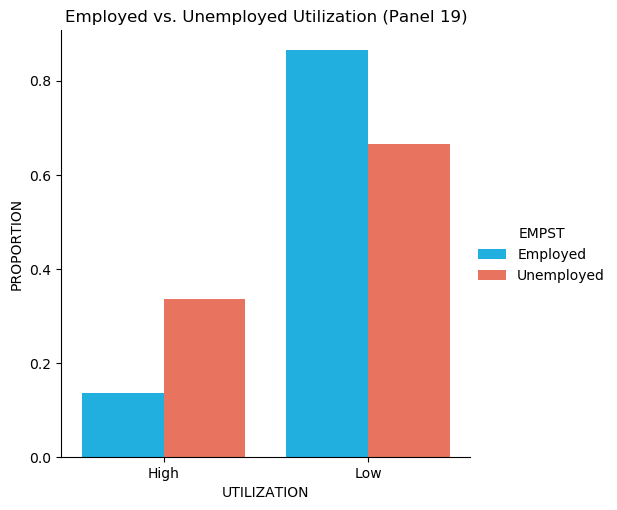

In [20]:
# identified disparity in occurance of high utilization with categories of employment
# -1 inapplicable, 1 employed, 2 job to return, 3 job during period, 4 unemployed
# df_panel_19_reduced[df_panel_19_reduced['EMPST'] == 4]['UTILIZATION'].value_counts(), df_panel_19_reduced[(df_panel_19_reduced['EMPST'] != 4) & (df_panel_19_reduced['EMPST'] != -1)]['UTILIZATION'].value_counts()
# select and modify useful columns, remove inapplicables
util_data_2 = df_panel_19_reduced.copy()[['EMPST', 'UTILIZATION', 'AGE']].rename(columns={'AGE': 'COUNT'})
util_data_2 = util_data_2[util_data_2['EMPST'] != -1]
util_data_2['EMPST'] = util_data_2['EMPST'].replace([1, 2, 3], 'Employed').replace(4, 'Unemployed')
util_data_2['UTILIZATION'] = util_data_2['UTILIZATION'].replace([0, 1], ['Low', 'High'])
util_data_2 = util_data_2.groupby(['EMPST', 'UTILIZATION']).count().reset_index()

# Calculate proportions
util_data_2['PROPORTION'] = util_data_2.groupby('EMPST')['COUNT'].transform(lambda x: x / x.sum())

# Visualize with proportions
sns.catplot(data=util_data_2, kind="bar", x="UTILIZATION", y="PROPORTION", hue="EMPST", palette=['deepskyblue', 'tomato'])
plt.title('Employed vs. Unemployed Utilization (Panel 19)')
plt.show()

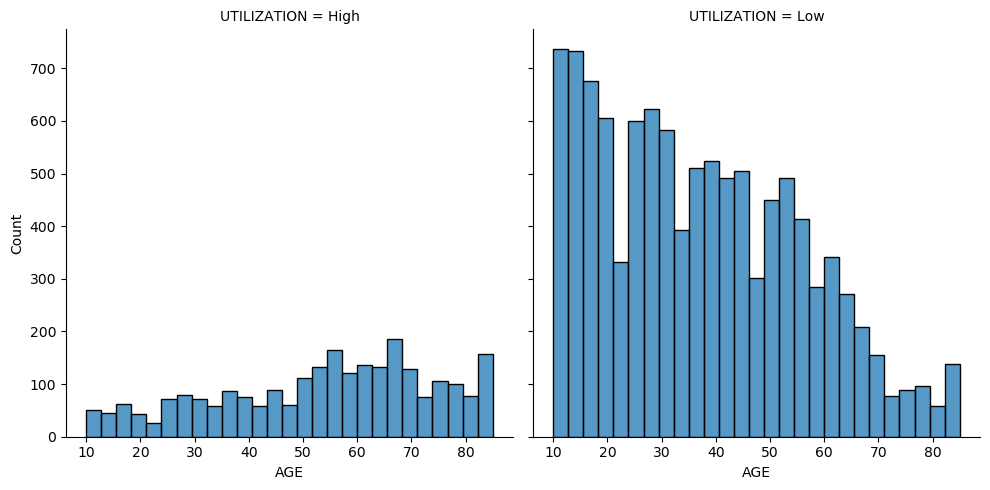

In [21]:
# identified disparity in occurance of high utilization with age
# select and modify useful columns, remove inapplicables
util_data_3 = df_panel_19_reduced.copy()
util_data_3['UTILIZATION'] = util_data_3['UTILIZATION'].replace([0,1], ['Low', 'High'])
# visualize
sns.displot(util_data_3, x="AGE", col="UTILIZATION")
plt.show()

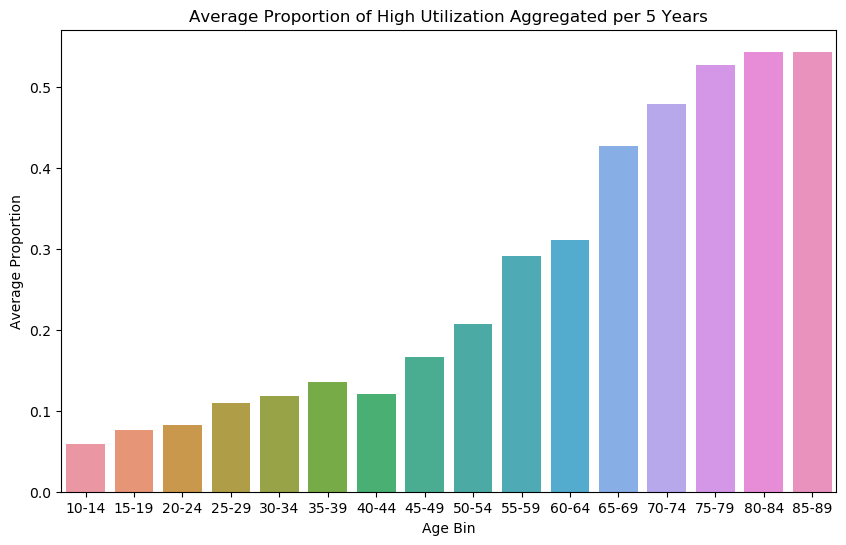

In [22]:
df = df_panel_19_reduced.copy()
df['UTILIZATION'] = df['UTILIZATION'].replace([0,1], ['Low', 'High'])
# Calculate the minimum and maximum ages in the dataset
min_age = df['AGE'].min()
max_age = df['AGE'].max()

# Define the bin edges with a 5-year interval
bin_edges = list(range(min_age, max_age + 6, 5))
bin_labels = [f'{start}-{start + 4}' for start in bin_edges[:-1]]

# Create age bins
df['Age Bin'] = pd.cut(df['AGE'], bins=bin_edges, labels=bin_labels, right=False)

# Calculate average proportions within each age bin
proportions_data = df.groupby(['Age Bin', 'UTILIZATION'], observed=True).size().unstack()
proportions_data['Proportion'] = proportions_data['High'] / (proportions_data['High'] + proportions_data['Low'])
proportions_data = proportions_data.reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=proportions_data, x='Age Bin', y='Proportion', hue_order=['Low', 'High'])
plt.xlabel('Age Bin')
plt.ylabel('Average Proportion')
plt.title('Average Proportion of High Utilization Aggregated per 5 Years')
plt.show()

# as age increases, high utilization increases -> 65+ seems to be a group of interest

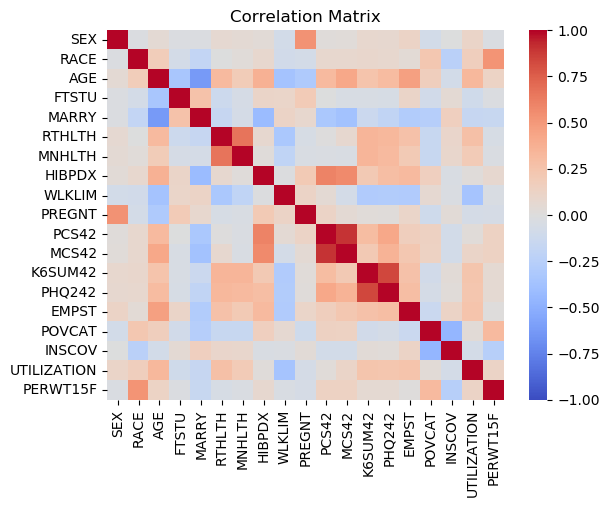

In [23]:
# Correlation plots
# not sure of which columns we all want to use yet but these are the ones I would keep in features_to_keep.
# Looking at the full correlation matrix for all the columns, a lot of the ones left out are highly correlated to a
# column included. Feel free to look at the full matrix for context.
cor = df_panel_19_reduced[['SEX', 'RACE', 'AGE', 'FTSTU', 'MARRY', 'RTHLTH', 'MNHLTH', 'HIBPDX', 'WLKLIM', 'PREGNT', 'PCS42', 'MCS42', 'K6SUM42', 'PHQ242', 'EMPST', 'POVCAT', 'INSCOV', 'UTILIZATION', 'PERWT15F']].replace(['Non-White', 'White'],[0, 1]).corr()
hm = sns.heatmap(cor, vmin=-1, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#### 2.5 Other analysis

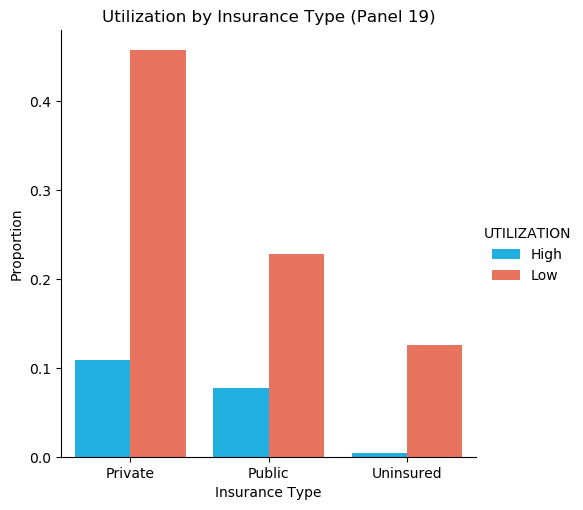

In [24]:
# Comparing utilization between different insurance types
# It seems that those with Public insurance tend to have a relatively higher utilization score

ins_df = df_panel_19_reduced.copy()[['INSCOV', 'UTILIZATION', 'AGE']]
ins_df = ins_df[ins_df['INSCOV'] != -1]
ins_df['INSCOV'] = ins_df['INSCOV'].replace({1: "Private", 2: "Public", 3: "Uninsured"})
ins_df['UTILIZATION'] = ins_df['UTILIZATION'].replace({0: "Low", 1: "High"})
ins_df = ins_df.groupby(['UTILIZATION', 'INSCOV'])['AGE'].count().reset_index()
ins_df['PROPS'] = ins_df['AGE'] / (ins_df['AGE'].sum())

sns.catplot(data=ins_df, kind="bar", x="INSCOV", y="PROPS", hue="UTILIZATION", palette=['deepskyblue', 'tomato'])
plt.title('Utilization by Insurance Type (Panel 19)')
plt.ylabel('Proportion')
plt.xlabel('Insurance Type')
plt.show()

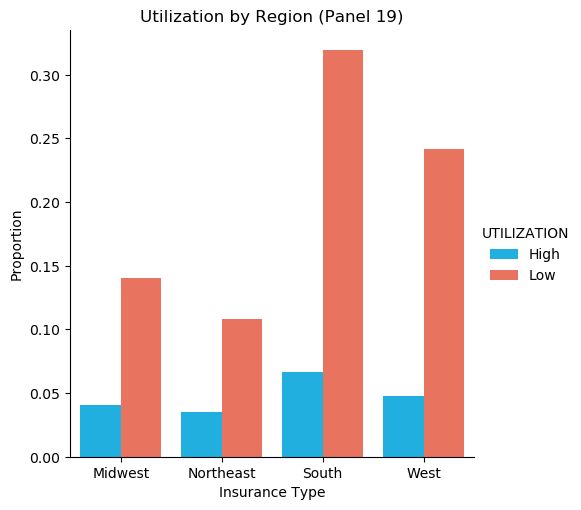

In [25]:
reg_df = df_panel_19_reduced.copy()[['REGION', 'UTILIZATION', 'AGE']]
reg_df = reg_df[reg_df['REGION'] != -1]
reg_df['REGION'] = reg_df['REGION'].replace({1: "Northeast", 2: "Midwest", 3: "South", 4: 'West'})
reg_df['UTILIZATION'] = reg_df['UTILIZATION'].replace({0: "Low", 1: "High"})
reg_df = reg_df.groupby(['UTILIZATION', 'REGION'])['AGE'].count().reset_index()
reg_df['PROPS'] = reg_df['AGE'] / (reg_df['AGE'].sum())

sns.catplot(data=reg_df, kind="bar", x="REGION", y="PROPS", hue="UTILIZATION", palette=['deepskyblue', 'tomato'])
plt.title('Utilization by Region (Panel 19)')
plt.ylabel('Proportion')
plt.xlabel('Insurance Type')
plt.show()

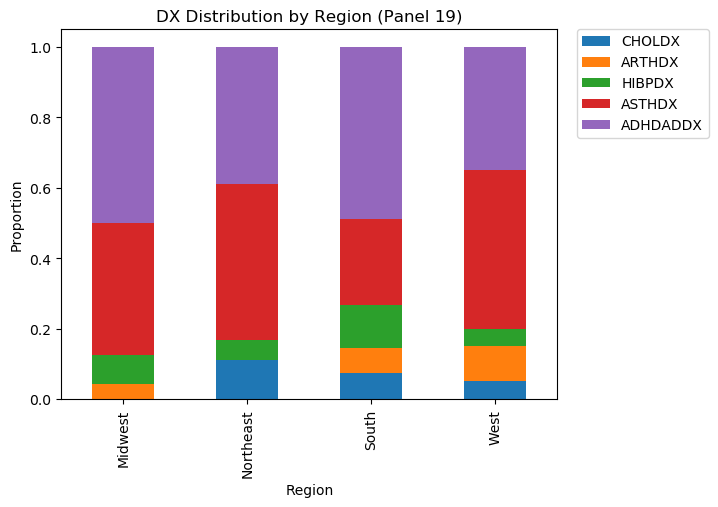

In [26]:
# looking at diseases by region

cols = ['REGION'] + [i for i in df_panel_19_reduced.columns if i.endswith('DX')]
regdx_df = df_panel_19_reduced.copy()[cols]
regdx_df['REGION'] = regdx_df['REGION'].replace({1: "Northeast", 2: "Midwest", 3: "South", 4: 'West'})
regdx_df = regdx_df[~regdx_df.eq(-1).any(axis=1)]
regdx_df = regdx_df.replace({2: 0})
regdx_df = regdx_df.groupby('REGION').sum()
regdx_df = regdx_df[regdx_df.sum().sort_values()[-5:].index] #only using the top 5 dx for simplicity's sake
regdx_dens = regdx_df.divide(regdx_df.sum(axis = 1), axis = 0)

regdx_dens.plot(kind='bar', stacked=True)
plt.title('DX Distribution by Region (Panel 19)')
plt.ylabel('Proportion')
plt.xlabel('Region')
plt.legend(fontsize = 10, bbox_to_anchor=(1.025, 1.02))


### End of Replication Part 01 -  EDA


-----
### Start of Replication Part 02 -  Model Development, and Fairness Evaluation

#### There are **two** components to Replication Project Part #02
1. Training models without de-biasing, using IBM's tutorial
2. Training models without de-biasing, using your own model development techniques including (1) Feature Selection, (2) Encoding, (3) Binning Features, and other items 

#### We will now return to IBM AIF360's [Medical Expenditure Tutorial](https://urldefense.com/v3/__https://nbviewer.org/github/IBM/AIF360/blob/master/examples/tutorial_medical_expenditure.ipynb__;!!Mih3wA!BOEOztl97chVva97r53aT50dEFwNxxI2GkzmaN6Ka1BWLdgKKh2LJXrxTrJ7odgsEuyLI8wAkAntxJCXF4o$ ) 
_*Note that it is primarily Scikit-learn based_

* A reminder, you will need to fork [AIF360's repository](https://urldefense.com/v3/__https://github.com/Trusted-AI/AIF360__;!!Mih3wA!BOEOztl97chVva97r53aT50dEFwNxxI2GkzmaN6Ka1BWLdgKKh2LJXrxTrJ7odgsEuyLI8wAkAntlAxz2VI$ ) into your own GitHub and access the notebook locally or via your method of choice
* AIF360's Repository can be found under: `AIF360`/`Examples`/tutorial_medical_expenditure.ipynb
* Ensure you have your `aif360` environment turned and activated using a miniconda prompt
* Use Jupyter Labs
* Refer to [Week 03](https://urldefense.com/v3/__https://nanrahman.github.io/capstone-responsible-ai/weeks/03-Replication-Part-00/__;!!Mih3wA!BOEOztl97chVva97r53aT50dEFwNxxI2GkzmaN6Ka1BWLdgKKh2LJXrxTrJ7odgsEuyLI8wAkAntCqYttZg$ ) content on the course Website to access the `Quickstart Guide`






### [3.](#Table-of-Contents) Model Development without Debiasing 


First, load all necessary packages

In [27]:
import sys
sys.path.insert(0, '../')

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Markdown, display

# Datasets
from aif360.datasets import MEPSDataset19
from aif360.datasets import MEPSDataset20
from aif360.datasets import MEPSDataset21
from aif360.datasets import StandardDataset

# Fairness metrics
from aif360.metrics import BinaryLabelDatasetMetric
from aif360.metrics import ClassificationMetric

# Explainers
from aif360.explainers import MetricTextExplainer

# Train Test Split
from sklearn.model_selection import train_test_split

# Pre-processing from Sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer

# Classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

# Bias mitigation techniques
from aif360.algorithms.preprocessing import Reweighing
from aif360.algorithms.inprocessing import PrejudiceRemover

# LIME
from aif360.datasets.lime_encoder import LimeEncoder
import lime
from lime.lime_tabular import LimeTabularExplainer

np.random.seed(1)

### 3.1. Load data & create splits for learning/validating/testing model

In [28]:
# combine panel 19 and 20 raw data
X = pd.concat([df_panel_19, df_panel_20], ignore_index=True)

# White and Non-White to 1 and 0 (change to default_mappings)
X = X.replace({'White':1, 'Non-White':0})

In [29]:
# transforming dataframe into AIF compatible format
dataset = StandardDataset(X, label_name = 'UTILIZATION', favorable_classes=[1],
                 protected_attribute_names= ['RACE'], privileged_classes = [[1]], metadata=default_mappings)

In [30]:
# Splitting into 70/15/15 train/val/test
dataset_X_train, dataset_X_val, dataset_X_test = dataset.split([0.7, 0.85], shuffle=True)

##### Utility Functions for Bias Metric Evaluation

In [31]:
from utility import test, describe_metrics

### 3.2. Learning a Logistic Regression (LR) classifier on original data

In [32]:
# hyper parameter tuning
params = {'penalty': ['l1','l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
clf = GridSearchCV(LogisticRegression(solver = 'liblinear', random_state=1), params, refit=True)
clf = clf.fit(dataset_X_train.features, dataset_X_train.labels.ravel())
clf.best_estimator_

LogisticRegression(C=100, penalty='l1', random_state=1, solver='liblinear')

In [33]:
# applying best estimator

log_clf = make_pipeline(StandardScaler(), clf.best_estimator_)
log_clf.fit(dataset_X_train.features, dataset_X_train.labels.ravel())

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=100, penalty='l1', random_state=1,
                                    solver='liblinear'))])

In [34]:
# validation metric summary
thresh_arr = np.linspace(0.01, 0.5, 50)
log_val_metrics = test(dataset=dataset_X_val,
                   model=log_clf,
                   thresh_arr=thresh_arr)
log_org_best_ind = np.argmax(log_val_metrics['bal_acc'])
describe_metrics(log_val_metrics, thresh_arr)

Threshold corresponding to Best balanced accuracy: 0.1800
Best balanced accuracy: 0.7513
Corresponding 1-min(DI, 1/DI) value: 0.6201
Corresponding average odds difference value: -0.2350
Corresponding statistical parity difference value: -0.2923
Corresponding equal opportunity difference value: -0.2206
Corresponding Theil index value: 0.0971


### 3.3. Learning a Random Forest (RF) classifier on original data

In [35]:
# Training Random Forest

rf_clf = RandomForestClassifier(class_weight = 'balanced') 
#'High Utilization' class makes up only ~20% of the test/val sets; unbalanced
rf_clf.fit(dataset_X_train.features, dataset_X_train.labels.ravel())

RandomForestClassifier(class_weight='balanced')

##### Validation Set Fairness Metric Summary

In [36]:
thresh_arr = np.linspace(0.01, 0.5, 50)
rf_val_metrics = test(dataset=dataset_X_val,
                   model=rf_clf,
                   thresh_arr=thresh_arr)
rf_org_best_ind = np.argmax(rf_val_metrics['bal_acc'])

In [37]:
describe_metrics(rf_val_metrics, thresh_arr)

Threshold corresponding to Best balanced accuracy: 0.2000
Best balanced accuracy: 0.7606
Corresponding 1-min(DI, 1/DI) value: 0.5304
Corresponding average odds difference value: -0.1723
Corresponding statistical parity difference value: -0.2350
Corresponding equal opportunity difference value: -0.1540
Corresponding Theil index value: 0.0934


##### Test Set Fairness Metric Summary

In [38]:
thresh_arr = np.linspace(0.01, 0.5, 50)
rf_test_metrics = test(dataset=dataset_X_test,
                   model=rf_clf,
                   thresh_arr=thresh_arr)

In [39]:
describe_metrics(rf_test_metrics, thresh_arr)

Threshold corresponding to Best balanced accuracy: 0.2000
Best balanced accuracy: 0.7638
Corresponding 1-min(DI, 1/DI) value: 0.5577
Corresponding average odds difference value: -0.1724
Corresponding statistical parity difference value: -0.2568
Corresponding equal opportunity difference value: -0.1339
Corresponding Theil index value: 0.0928


### Section 3 Write Up here

### Part-01: For **both** the logistic regression and random forest classifiers learned on the original data, please include explain the results of your fairness metrics. For _each_ metric result briefly describe what this value means in 1-2 sentences (is it fair, is it not fair? Why?)

**Fairness Metric Summary** 
* Threshold corresponding to Best balanced accuracy:
* Best balanced accuracy: 
* Corresponding 1-min(DI, 1/DI) value: 
* Corresponding average odds difference value: 
* Corresponding statistical parity difference value: 
* Corresponding equal opportunity difference value:
* Corresponding Theil index value:

##### Logistic Regression Test Set
* Threshold corresponding to Best balanced accuracy: 0.1800
* Best balanced accuracy: 0.7513 \
This metric suggests that the model did slightly worse than randomly selected classification. This is seen by the imbalance in the classes being around 80/20.
* Corresponding 1-min(DI, 1/DI) value: 0.6201 \
This metric shows that the rate of predicted positives are not equal between the privileged and unprivileged groups. With a value of 0.62, this metric suggests unfairness.
* Corresponding average odds difference value: -0.2350 \
This metric shows that the error rate for the unprivileged group is higher than that of the privileged group. This metric suggests unfairness.
* Corresponding statistical parity difference value: -0.2923 \
This metric shows that the unprivileged group has a lower probability of a favorable outcome compared to the privileged group.
* Corresponding equal opportunity difference value: -0.2206 \
This metric shows that the privileged group has a high true positive rate when compared to the unprivileged group.
* Corresponding Theil index value: 0.0971 \
This metric suggests slight unfairness, showing that there is a little economic inequality present.

##### Random Forest Test Set
* Threshold corresponding to Best balanced accuracy: 0.2000
* Best balanced accuracy: 0.7638 \
This metric suggests that the model did slightly worse than randomly selected classification. This is seen by the imbalance in the classes being around 80/20.

* Corresponding 1-min(DI, 1/DI) value: 0.5577 \
This metric value of .54 shows that the rate of predicted positives are not equal between the privileged and unprivileged groups. This metric suggests unfairness.

* Corresponding average odds difference value: -0.1724 \
This metric shows that the error rate for the unprivileged group is higher than that of the privileged group. This metric suggests unfairness.

* Corresponding statistical parity difference value: -0.2568 \
This metric shows that the unprivileged group has a lower probability of a favorable outcome compared to the privileged group.

* Corresponding equal opportunity difference value: -0.1339 \
This metric shows that the privileged group has a high true positive rate when compared to the unprivileged group.

* Corresponding Theil index value: 0.0928 \
This metric suggests that there is some, but really not much, economic inequality present.

### Part-02: Please write one paragraph for each question.
1. How can we determine which metrics to use, given our data and use case? You can refer to [Course material](https://urldefense.com/v3/__https://nanrahman.github.io/capstone-responsible-ai/weeks/06-Fairness-Assessments/__;!!Mih3wA!BOEOztl97chVva97r53aT50dEFwNxxI2GkzmaN6Ka1BWLdgKKh2LJXrxTrJ7odgsEuyLI8wAkAntO_2AYl4$ ), online research and Guidance provided by [AIF360](https://urldefense.com/v3/__http://aif360.mybluemix.net/resources*)*5Cn__;IyU!!Mih3wA!BOEOztl97chVva97r53aT50dEFwNxxI2GkzmaN6Ka1BWLdgKKh2LJXrxTrJ7odgsEuyLI8wAkAntaNs6CTw$ 
   
   Given that we’re utilizing the MEPS data to identify high-utilization patients, we should use metrics that evaluate the outcomes across groups and make sure they’re being treated equally. Out of the competing fairness metrics, we should prioritize the 1-min (DI, 1/DI) value, statistical parity difference value, and equal opportunity difference value. By examining disparate impact (DI), measuring the proportion of true positives or true negatives for different demographic groups, we can pinpoint unfair treatment and its impact on various patient subgroups. Simultaneously, statistical parity seeks an even distribution of positive outcomes, ensuring consistency among demographic group. Additionally, equal opportunity focuses on equalizing true positive rates, ensuring similar accuracy in identifying high-utilization patients across different demographic groups.


2. When you have competing fairness metrics, how to pick which to prioritize?
    
    In the case there are competing fairness metrics, you have to consider the specific goals of your study and its ethical considerations. Moreover, the trade-offs between metrics need to be evaluated, taking into account the aspects of fairness that are most relevant for your purpose. For example, in this study, we want to emphasize metrics that address disparities without compromising overall model performance because we’re trying to identify high-utilization patients from MEPS data and evaluate the disparities between the privileged and unprivileged classes.
 
 
3. What do you do when you encounter different definitions for similar metrics?
    
    When encountering different definitions for similar metrics, it’s important to carefully assess and understand the nuances of each one. After that, you should compare the definitions while thinking about your specific application and study objectives, as adopting one definition over another can lead to different implications in terms of model performance and fairness. Consulting relevant literature and gaining more domain knowledge can provide more insight as well. After narrowing down the definition, it’s important to be transparent by documenting it in the work it’s being used in. For comparison purposes, analyses can be conducted using multiple definitions to assess the robustness of results and provide a comprehensive view of the metric’s behavior across different definitions.


4. Based on this, which model and fairness metric appears the best to proceed with?
    Algorithms such as Random Forest or Gradient Boosting could be useful here due to their ability to handle large and complex datasets with numerous features. These models have the potential to be highly accurate and are able to model non-linear relationships, which is crucial in healthcare data that often involves complex interactions between variables. Regarding the fairness metrics, we believe that the 1-min (DI, 1/DI) value, statistical parity difference, and equal opportunity difference should be prioritized. The 1-min (DI, 1/DI) value is crucial for identifying if certain groups are unfairly disadvantaged. The statistical parity difference metric is essential for ensuring that the positive outcomes (like identifying high-utilization patients) are evenly distributed across different demographic groups. Lastly, the equal opportunity difference metric is also vital in ensuring that the model has similar true positive rates across groups, which is especially important in healthcare scenarios where missing high-utilization patients can have significant consequences. A model that can combine the robustness and accuracy of algorithms like Random Forest or Gradient Boosting, paired with a careful application of the chosen fairness metrics, is a combination that will help ensure that the model is not only effective in identifying high-utilization patients but also fair and unbiased in its predictions across different demographic groups.

### [4.](#Table-of-Contents) Additional Model Development



### 4.1A Load data & create splits for learning/validating/testing model

In [40]:
# combine panel 19 and 20 reduced data
X = pd.concat([df_panel_19_reduced, df_panel_20_reduced], ignore_index=True)

# White and Non-White to 1 and 0 (change to default_mappings)
X = X.replace({'White':1, 'Non-White':0})

In [41]:
# transforming dataframe into AIF compatible format
dataset = StandardDataset(X, label_name = 'UTILIZATION', favorable_classes=[1],
                 protected_attribute_names= ['RACE'], privileged_classes = [[1]], metadata=default_mappings)

In [42]:
# Splitting into 70/15/15 train/val/test
dataset_X_train, dataset_X_val, dataset_X_test = dataset.split([0.7, 0.85], shuffle=True)

### 4.1B Utilize findings from your EDA to complete any additional model development

In [43]:
# Examples:

# Feature selection // I can't begin to tell you what features are actually important
# encoding // everything is quite literally encoded already
# binning categorical features // why would we bin categorical? I Think they mean numerical

# not really sure what things we could do rn, I feel like we would need to really understand the dataset

# Feel free to use the codebook from MEPS to explore other variables

In [44]:
#### binning weight, 1 being the lowest representation and 5 being the highest
# since weight is so weirdly collected i figured this would help, but it still is unclear in context. 
# tbh don't think it made a difference lol, feel free to delete/change

# Ben: I don't think it's a bad idea to use the statistical weight - but I think it won't help much for utilization
# in fact, preserving the raw value might be better here
dev_X = X.copy()
# dev_X['WeightBins'] = pd.cut(dev_X['PERWT15F'], 5, labels = [1, 2, 3, 4, 5])
# dev_X = dev_X.drop(columns = 'PERWT15F')

In [45]:
# binning other numerical columns
# selecting number of bins in order to separate -1 into its own bin
dev_X['PCS42Bins'] = pd.cut(dev_X['PCS42'], 14, labels = [-1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])
dev_X['MCS42Bins'] = pd.cut(dev_X['MCS42'], 11, labels = [-1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
dev_X = dev_X.drop(columns = ['PCS42', 'MCS42'])

In [46]:
# lets bin age with bin size 10 -> ID assigned by taking the floor of the age (i.e. 19 -> 1)
bins = list(range(10,100, 10))
labels = list(range(1,9))
dev_X['AGEBins'] = pd.cut(dev_X['AGE'], bins =  bins, labels=labels, right=False)
dev_X = dev_X.drop(columns = ['AGE'])

In [47]:
dev_dataset = StandardDataset(dev_X, label_name = 'UTILIZATION', favorable_classes=[1],
                 protected_attribute_names= ['RACE'], privileged_classes = [[1]], metadata=default_mappings)

In [48]:
# Splitting into 70/15/15 train/val/test
dev_dataset_X_train, dev_dataset_X_val, dev_dataset_X_test = dev_dataset.split([0.7, 0.85], shuffle=True)

### 4.2. Learning a Logistic Regression (LR) classifier on original data

In [49]:
# Use the same methods from Section 3
# hyper parameter tuning
params = {'penalty': ['l1','l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
clf = GridSearchCV(LogisticRegression(solver = 'liblinear', random_state=1), params, refit=True)
clf = clf.fit(dev_dataset_X_train.features, dev_dataset_X_train.labels.ravel())
clf.best_estimator_

LogisticRegression(C=1, penalty='l1', random_state=1, solver='liblinear')

In [50]:
# applying best estimator
log_clf = make_pipeline(StandardScaler(), clf.best_estimator_)
log_clf.fit(dev_dataset_X_train.features, dev_dataset_X_train.labels.ravel())

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=1, penalty='l1', random_state=1,
                                    solver='liblinear'))])

In [51]:
# validation metric summary
thresh_arr = np.linspace(0.01, 0.5, 50)
log_val_metrics = test(dataset=dev_dataset_X_val,
                   model=log_clf,
                   thresh_arr=thresh_arr)
log_org_best_ind = np.argmax(log_val_metrics['bal_acc'])

In [52]:
describe_metrics(log_val_metrics, thresh_arr)

Threshold corresponding to Best balanced accuracy: 0.1700
Best balanced accuracy: 0.7521
Corresponding 1-min(DI, 1/DI) value: 0.5671
Corresponding average odds difference value: -0.2110
Corresponding statistical parity difference value: -0.2941
Corresponding equal opportunity difference value: -0.1727
Corresponding Theil index value: 0.0994


### 4.3. Learning a Random Forest (RF) classifier on original data

In [53]:
# Use the same methods from Section 3
# Training Random Forest
rf_params = {'max_depth': [20, 40, 60, 80, 100, None], 'max_features': ['sqrt', 'log2']}
rf_clf = GridSearchCV(RandomForestClassifier(class_weight = 'balanced'), rf_params, refit=True)

rf_clf.fit(dev_dataset_X_train.features, dev_dataset_X_train.labels.ravel())
rf_clf_b = rf_clf.best_estimator_

In [54]:
rf_clf_b.fit(dev_dataset_X_train.features, dev_dataset_X_train.labels.ravel())

RandomForestClassifier(class_weight='balanced', max_depth=20,
                       max_features='log2')

##### Validation Set Fairness Metric Summary

In [55]:
thresh_arr = np.linspace(0.01, 0.5, 50)
rf_val_metrics = test(dataset=dev_dataset_X_val,
                   model=rf_clf_b,
                   thresh_arr=thresh_arr)
rf_org_best_ind = np.argmax(rf_val_metrics['bal_acc'])

In [56]:
describe_metrics(rf_val_metrics, thresh_arr)

Threshold corresponding to Best balanced accuracy: 0.2300
Best balanced accuracy: 0.7423
Corresponding 1-min(DI, 1/DI) value: 0.5267
Corresponding average odds difference value: -0.1896
Corresponding statistical parity difference value: -0.2832
Corresponding equal opportunity difference value: -0.1297
Corresponding Theil index value: 0.1001


##### Test Set Fairness Metric Summary

In [57]:
thresh_arr = np.linspace(0.01, 0.5, 50)
rf_test_metrics = test(dataset=dev_dataset_X_test,
                   model=rf_clf_b,
                   thresh_arr=thresh_arr)

In [58]:
describe_metrics(rf_test_metrics, thresh_arr)

Threshold corresponding to Best balanced accuracy: 0.2400
Best balanced accuracy: 0.7745
Corresponding 1-min(DI, 1/DI) value: 0.6021
Corresponding average odds difference value: -0.2392
Corresponding statistical parity difference value: -0.3395
Corresponding equal opportunity difference value: -0.1907
Corresponding Theil index value: 0.0897


### Section 4 Write Up here

**1. For both the logistic regression and random forest classifiers learned on the original data, please include the results of your fairness metrics. For _each_ metric result briefly describe (1-2 sentences) if you saw any differences from your results in Part 3, and what that might mean.**

_Fairness Metrics_
   * Threshold corresponding to Best balanced accuracy:
   * Best balanced accuracy: 
   * Corresponding 1-min(DI, 1/DI) value: 
   * Corresponding average odds difference value: 
   * Corresponding statistical parity difference value: 
   * Corresponding equal opportunity difference value:
   * Corresponding Theil index value:

##### Logistic Regression Test Set
* Threshold corresponding to Best balanced accuracy: 0.2000
* Best balanced accuracy: 0.7606 \
This metric did improve slightly from 0.7513 of part 3, however, it is still below that of a randomly selected classification.
* Corresponding 1-min(DI, 1/DI) value: 0.5304 \
This metric shows that the rate of predicted positives is not equal between the groups. Still, the model did improve from 0.6201 of part 3.
* Corresponding average odds difference value: -0.1723 \
This metric shows that the error rate for the unprivileged group is higher than that of the privileged group. The model improved from -0.235 of part 3.
* Corresponding statistical parity difference value: -0.2350 \
This metric shows that the unprivileged group has a lower probability of a favorable outcome compared to the privileged group. The model improved from -0.2923 of part 3.
* Corresponding equal opportunity difference value: -0.1540 \
This metric shows that the privileged group has a higher true positive rate when compared to the unprivileged group. The model improved from -0.2206 of part 3.
* Corresponding Theil index value: 0.0934 \
This metric suggests that there is very little economic inequality present. The model almost negligibly improved from 0.0971 of part 3.

##### Random Forest Test Set
* Threshold corresponding to Best balanced accuracy: 0.2100
* Best balanced accuracy: 0.7700 \
This metric suggests that the model did slightly worse than randomly selected classification. This is seen by the imbalance in the classes being around 80/20.

* Corresponding 1-min(DI, 1/DI) value: 0.5753 \
This metric value of .54 shows that the rate of predicted positives are not equal between the privileged and unprivileged groups. This metric suggests unfairness. There is not much difference from part 3, further development would probably change this.

* Corresponding average odds difference value: -0.2062 \
This metric shows that the error rate for the unprivileged group is higher than that of the privileged group. This metric suggests unfairness. There is not much difference from part 3, further development would probably change this.

* Corresponding statistical parity difference value: -0.2899 \
This metric shows that the unprivileged group has a lower probability of a favorable outcome compared to the privileged group. There is not much difference from part 3, further development would probably change this.

* Corresponding equal opportunity difference value: -0.1866 \
This metric shows that the privileged group has a higher true positive rate when compared to the unprivileged group. Slightly greater than the same metric from part 3, suggesting slight improvement on fairness.

* Corresponding Theil index value: 0.0943 \
This metric suggests that there is some, but really not much, economic inequality present. This metric is slightly greater than that in part 3, further development would be needed to bring this value down.

**2. Based on this, would you make any recommendations during model development? Does it change which model and fairness metric would be the best to proceed with?** (Please write at least one paragraph)

   The best balanced accuracy of 0.7475 indicates a relatively high level of accuracy, which is positive. However, the corresponding 1-min(DI, 1/DI) value of 0.5387 shows significant disparate impact, suggesting that one group is favored over another. This is a critical area of concern in healthcare settings, where equitable treatment is of the utmost importance. The average odds difference value of -0.2150 and the statistical parity difference value of -0.2839 may both indicate disparities in treatment or prediction outcomes between different groups. These negative values may suggest that our model is less favorable to the unprivileged group, which is a significant ethical concern. The equal opportunity difference value of -0.1908 further reinforces this concern, indicating that the true positive rate is not the same across groups. This could potentially mean that the model is less accurate in identifying high-utilization patients in certain demographic groups.The Theil index value of 0.1031, while not necessarily high, could still indicate that there is a degree of severity at some level of inequality in the model's predictions. Given the high accuracy, it may be valuable to also explore other models, such as logistic regression, to compare their fairness metrics. Additionally, applying techniques like re-weighting the data, using different sampling strategies, or applying post-processing fairness techniques could help mitigate these biases.By re-weighting, the model can learn to make more equitable predictions across all groups, thus addressing issues like disparate impact or unequal opportunity rates. Different sampling strategies can lead to more balanced training, which helps in reducing bias in the model’s predictions. However, it is important to be careful with oversampling, as it can lead to overfitting. While the Random Forest model shows good accuracy, its fairness metrics indicate significant biases, which may require a re-evaluation of the model choice or the application of more effective bias mitigation strategies. Re-weighting the data and changing sampling strategies could help us address the issue at the data level, and therefore make the training process more equitable. Post-processing techniques, on the other hand, help adjust the model's output to ensure fairness.


### End of Replication Part 02 -  Model Development and Fairness Evaluation

----


# Start of Replication Part 03a -  Bias Mitigation Techniques

## There are **two** components to `Replication Project Part #03`

### Part 1. Run the full tutorial example. Within AIF360's Repository it can be found under: `AIF360`/`Examples`/tutorial_medical_expenditure.ipynb

#### BEFORE YOU BEGIN MAKE SURE THAT:
* A reminder, you will need to fork [AIF360's repository](https://github.com/Trusted-AI/AIF360) into your own GitHub and access the notebook locally or via your method of choice
* AIF360's Repository can be found under: `AIF360`/`Examples`/tutorial_medical_expenditure.ipynb
* Ensure you have your `aif360` environment turned and activated using a miniconda prompt
* Use Jupyter Labs
* Refer to [Week 03](https://nanrahman.github.io/capstone-responsible-ai/weeks/03-Replication-Part-00/) content on the course Website to access the `Quickstart Guide`

#### FOR THE DATA
* Downloade the `h181.csv` and `h192.csv` data files uploaded [here](https://www.kaggle.com/datasets/nanrahman/mepsdata)
* Place the `h181.csv` and `h192.csv` ino `../aif360/data/raw/meps/` of your forked AIF360 repository

### Part 2. Training models WITH de-biasing, trying out another type of de-biasing method

*Below is a list of additional notebooks that demonstrate the use of AIF360*

* NEW: [sklearn/demo_new_features.ipynb](https://github.com/Trusted-AI/AIF360/blob/master/examples/sklearn/demo_new_features.ipynb): highlights the features of the new scikit-learn-compatible API
* [demo_optim_data_preproc.ipynb](https://github.com/Trusted-AI/AIF360/blob/master/examples/demo_optim_data_preproc.ipynb): demonstrates a generalization of the credit scoring tutorial that shows the full machine learning workflow for the optimized data pre-processing algorithm for bias mitigation on several datasets
* [demo_adversarial_debiasing.ipynb](https://github.com/Trusted-AI/AIF360/blob/master/examples/demo_adversarial_debiasing.ipynb): demonstrates the use of the adversarial debiasing in-processing algorithm to learn a fair classifier
* [demo_calibrated_eqodds_postprocessing.ipynb](https://github.com/Trusted-AI/AIF360/blob/master/examples/demo_calibrated_eqodds_postprocessing.ipynb): demonstrates the use of an odds-equalizing post-processing algorithm for bias mitigiation
* [demo_disparate_impact_remover.ipynb](https://github.com/Trusted-AI/AIF360/blob/master/examples/demo_disparate_impact_remover.ipynb): demonstrates the use of a disparate impact remover pre-processing algorithm for bias mitigiation
* [demo_lfr.ipynb](https://github.com/Trusted-AI/AIF360/blob/master/examples/demo_lfr.ipynb): demonstrates the use of the learning fair representations algorithm for bias mitigation
* [demo_lime.ipynb](https://github.com/Trusted-AI/AIF360/blob/master/examples/demo_lime.ipynb): demonstrates how LIME - Local Interpretable Model-Agnostic Explanations - can be used with models learned with the AIF 360 toolkit to generate explanations for model predictions
* [demo_reject_option_classification.ipynb](https://github.com/Trusted-AI/AIF360/blob/master/examples/demo_reject_option_classification.ipynb): demonstrates the use of the Reject Option Classification (ROC) post-processing algorithm for bias mitigation
* [demo_reweighing_preproc.ipynb](https://github.com/Trusted-AI/AIF360/blob/master/examples/demo_reweighing_preproc.ipynb): demonstrates the use of a reweighing pre-processing algorithm for bias mitigation


### [5.](#Table-of-Contents) Bias Mitigation

**Utility function for plotting bias metrics**

In [59]:
from utility import plot

Load data & create train validation test split

In [60]:
# transforming dataframe into AIF compatible format
# using dev_X (data influenced by EDA findings)
dataset = StandardDataset(dev_X, label_name = 'UTILIZATION', favorable_classes=[1],
                 protected_attribute_names= ['RACE', 'AGEBins'], privileged_classes = [[1]], metadata=default_mappings)

In [61]:
# Splitting into 70/15/15 train/val/test
dataset_X_train, dataset_X_val, dataset_X_test = dataset.split([0.7, 0.85], shuffle=True)

### [5A.](#Table-of-Contents) Bias mitigation using pre-processing technique, Reweighing - AIF360 Example


In [62]:
privileged_groups = [{'RACE': 1}]
unprivileged_groups = [{'RACE': 0, 'AGEBins': 7, 'AGEBins': 8}]

In [63]:
RW = Reweighing(unprivileged_groups=unprivileged_groups,
                privileged_groups=privileged_groups)
dataset_rw_X_train = RW.fit_transform(dataset_X_train)

#### Logistic Regression

In [64]:
fit_params = {'logisticregression__sample_weight': dataset_rw_X_train.instance_weights}

In [65]:
# Use the same methods from Part 3 & 4
# hyper parameter tuning
params = {'penalty': ['l1','l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
clf = GridSearchCV(LogisticRegression(solver = 'liblinear', random_state=1), params, refit=True)
clf = clf.fit(dataset_rw_X_train.features, dataset_rw_X_train.labels.ravel())
clf.best_estimator_

LogisticRegression(C=1, penalty='l1', random_state=1, solver='liblinear')

In [66]:
# applying best estimator
log_clf = make_pipeline(StandardScaler(), clf.best_estimator_)
log_clf.fit(dataset_rw_X_train.features, dataset_rw_X_train.labels.ravel(), **fit_params)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=1, penalty='l1', random_state=1,
                                    solver='liblinear'))])

In [67]:
# validation metric summary
dataset_rw_X_val = RW.fit_transform(dataset_X_val)
thresh_arr = np.linspace(0.01, 0.5, 50)
log_val_metrics = test(dataset=dataset_rw_X_val,
                   model=log_clf,
                   thresh_arr=thresh_arr)
log_org_best_ind = np.argmax(log_val_metrics['bal_acc'])

In [68]:
describe_metrics(log_val_metrics, thresh_arr)

Threshold corresponding to Best balanced accuracy: 0.1600
Best balanced accuracy: 0.7495
Corresponding 1-min(DI, 1/DI) value: 0.4023
Corresponding average odds difference value: -0.1165
Corresponding statistical parity difference value: -0.1516
Corresponding equal opportunity difference value: -0.1064
Corresponding Theil index value: 0.0997


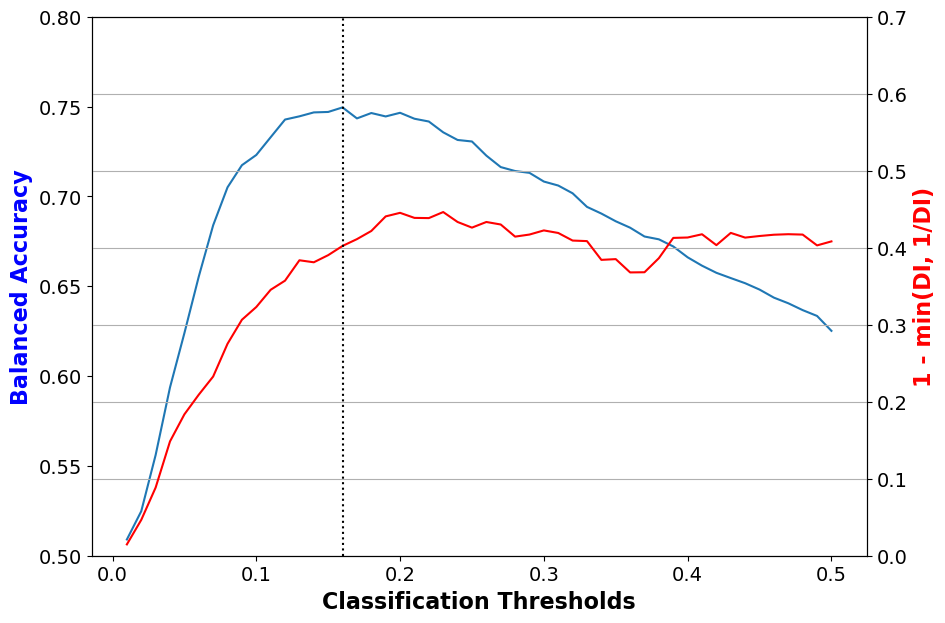

In [69]:
# Plotting Disparate Impact for Logistic Regression after Reweighting

disp_imp = np.array(log_val_metrics['disp_imp'])
disp_imp_err = 1 - np.minimum(disp_imp, 1/disp_imp)
plot(thresh_arr, 'Classification Thresholds',
     log_val_metrics['bal_acc'], 'Balanced Accuracy',
     disp_imp_err, '1 - min(DI, 1/DI)')

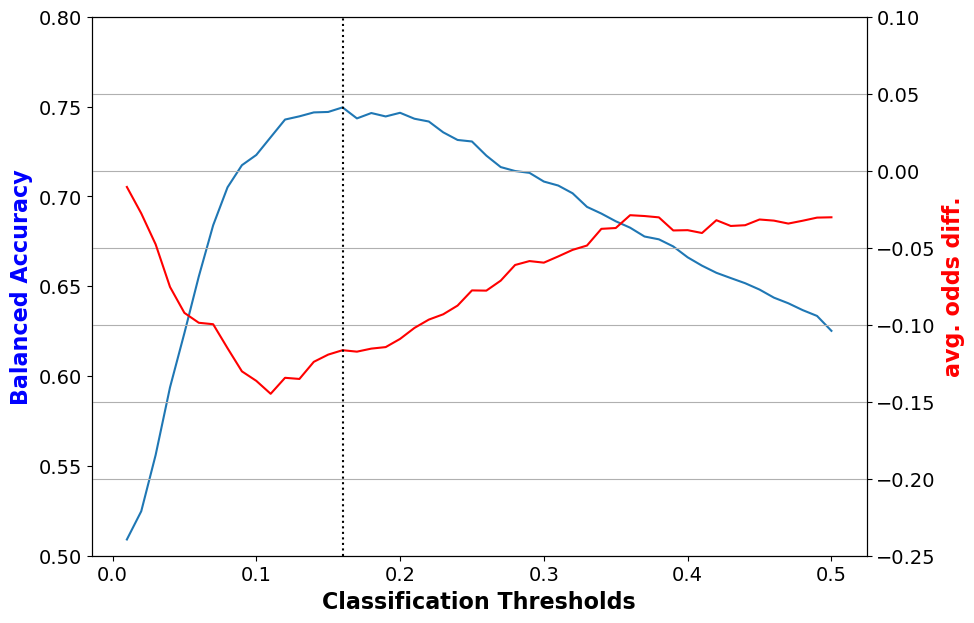

In [70]:
# Plotting Avg Odds Diff. for Logistic Regression after Reweighting

plot(thresh_arr, 'Classification Thresholds',
     log_val_metrics['bal_acc'], 'Balanced Accuracy',
     log_val_metrics['avg_odds_diff'], 'avg. odds diff.')

#### Random Forests

In [71]:
fit_params = {'randomforestclassifier__sample_weight': dataset_rw_X_train.instance_weights}

In [72]:
# Training Random Forest
rf_params = {'max_depth': [20, 40, 60, 80, 100, None], 'max_features': ['sqrt', 'log2']}
rf_clf = GridSearchCV(RandomForestClassifier(class_weight = 'balanced'), rf_params, refit=True)

rf_clf.fit(dataset_rw_X_train.features, dataset_rw_X_train.labels.ravel())

In [74]:
rf_clf_b = make_pipeline(StandardScaler(), rf_clf.best_estimator_)

In [75]:
rf_clf_b.fit(dev_dataset_X_train.features, dev_dataset_X_train.labels.ravel(), **fit_params)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=20,
                                        max_features='sqrt'))])

In [76]:
# validation metric summary
dataset_rw_X_val = RW.fit_transform(dataset_X_val)
thresh_arr = np.linspace(0.01, 0.5, 50)
rf_val_metrics = test(dataset=dataset_rw_X_val,
                   model=rf_clf_b,
                   thresh_arr=thresh_arr)
rf_org_best_ind = np.argmax(rf_val_metrics['bal_acc'])

In [77]:
describe_metrics(rf_val_metrics, thresh_arr)

Threshold corresponding to Best balanced accuracy: 0.3300
Best balanced accuracy: 0.9159
Corresponding 1-min(DI, 1/DI) value: 0.4259
Corresponding average odds difference value: -0.0528
Corresponding statistical parity difference value: -0.1081
Corresponding equal opportunity difference value: -0.0420
Corresponding Theil index value: 0.0363


In [78]:
# test metric summary
dataset_rw_X_test = RW.fit_transform(dataset_X_test)
thresh_arr = np.linspace(0.01, 0.5, 50)
rf_test_metrics = test(dataset=dataset_rw_X_test,
                   model=rf_clf_b,
                   thresh_arr=thresh_arr)

In [79]:
describe_metrics(rf_test_metrics, thresh_arr)

Threshold corresponding to Best balanced accuracy: 0.3300
Best balanced accuracy: 0.9164
Corresponding 1-min(DI, 1/DI) value: 0.4606
Corresponding average odds difference value: -0.0619
Corresponding statistical parity difference value: -0.1189
Corresponding equal opportunity difference value: -0.0462
Corresponding Theil index value: 0.0356


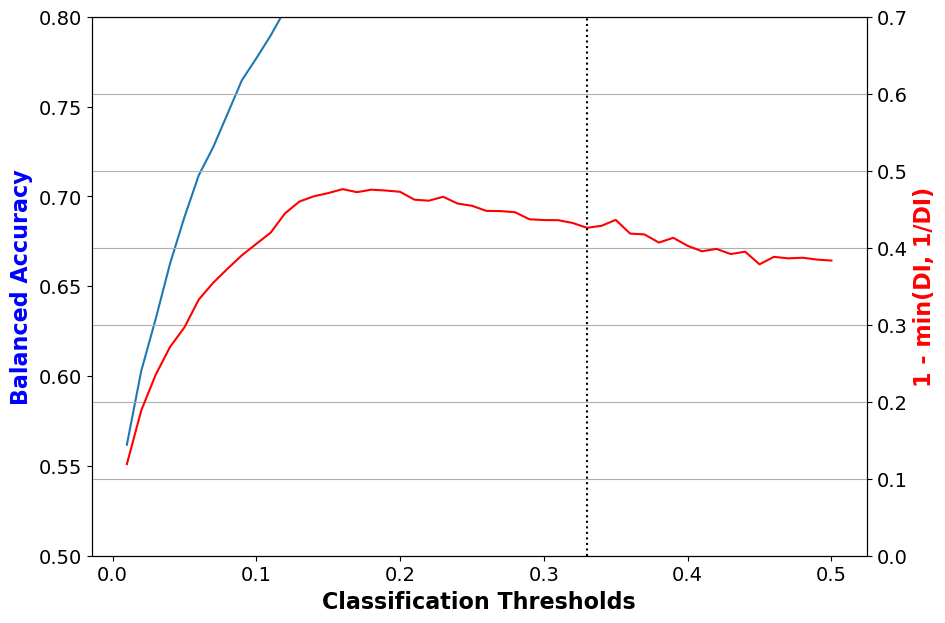

In [80]:
# Plotting Disparate Impact for Random Forest after Reweighting

disp_imp = np.array(rf_val_metrics['disp_imp'])
disp_imp_err = 1 - np.minimum(disp_imp, 1/disp_imp)
plot(thresh_arr, 'Classification Thresholds',
     rf_val_metrics['bal_acc'], 'Balanced Accuracy',
     disp_imp_err, '1 - min(DI, 1/DI)')

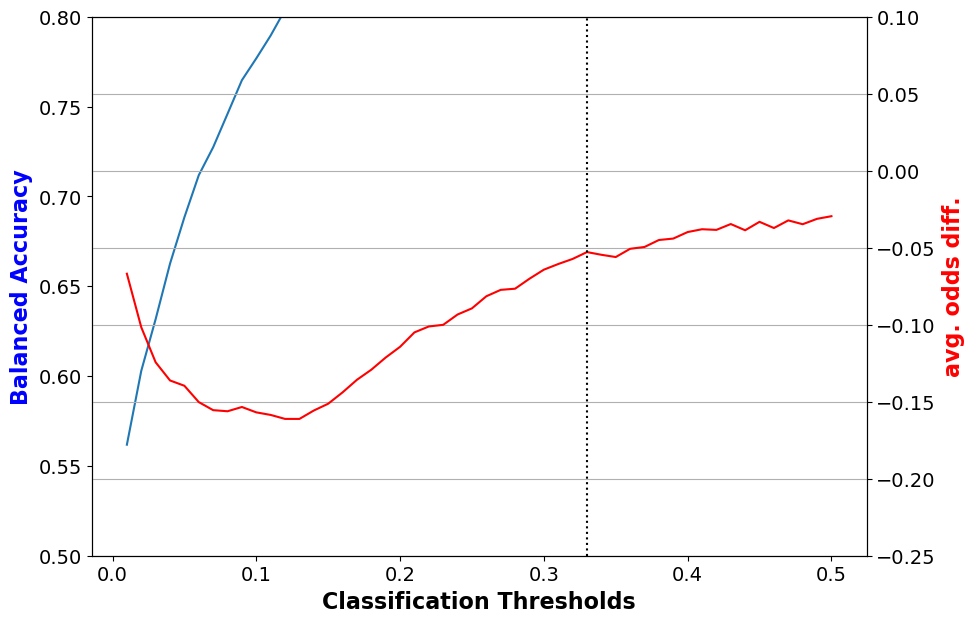

In [81]:
# Plotting Avg. Odds Diff. for Random Forest after Reweighting

plot(thresh_arr, 'Classification Thresholds',
     rf_val_metrics['bal_acc'], 'Balanced Accuracy',
     rf_val_metrics['avg_odds_diff'], 'avg. odds diff.')

### [5B.](#Table-of-Contents) Prejudice Remover (in-processing bias mitigation) -  AIF360 Example


In [82]:
# designate sensitive attributes
sens_attr = dataset_X_train.protected_attribute_names[0]

In [83]:
# Prejudice remover model w/ standard scaler
model = PrejudiceRemover(sensitive_attr=sens_attr, eta=25.0)
pr_orig_scaler = StandardScaler()

In [84]:
# fit model to standard scaled data
dataset_pr = dataset_X_train.copy()
dataset_pr.features = pr_orig_scaler.fit_transform(dataset_pr.features)
pr_model = model.fit(dataset_pr)

In [85]:
# adjust validation set
dataset_pr_val = dataset_X_val.copy()
dataset_pr_val.features = pr_orig_scaler.transform(dataset_pr_val.features)

In [86]:
# validation metric summary
thresh_arr = np.linspace(0.01, 0.50, 50)
val_metrics = test(dataset=dataset_pr_val,
                   model=pr_model,
                   thresh_arr=thresh_arr)
describe_metrics(val_metrics, thresh_arr)

Threshold corresponding to Best balanced accuracy: 0.1700
Best balanced accuracy: 0.6930
Corresponding 1-min(DI, 1/DI) value: 0.1922
Corresponding average odds difference value: 0.0277
Corresponding statistical parity difference value: -0.0660
Corresponding equal opportunity difference value: 0.0959
Corresponding Theil index value: 0.1246


In [87]:
# adjust test set
dataset_pr_test = dataset_X_test.copy()
dataset_pr_test.features = pr_orig_scaler.transform(dataset_pr_test.features)

In [88]:
# test metric summary
thresh_arr = np.linspace(0.01, 0.50, 50)
val_metrics = test(dataset=dataset_pr_test,
                   model=pr_model,
                   thresh_arr=thresh_arr)
describe_metrics(val_metrics, thresh_arr)

Threshold corresponding to Best balanced accuracy: 0.1200
Best balanced accuracy: 0.6899
Corresponding 1-min(DI, 1/DI) value: 0.1058
Corresponding average odds difference value: 0.0471
Corresponding statistical parity difference value: -0.0463
Corresponding equal opportunity difference value: 0.1172
Corresponding Theil index value: 0.1105


### [5C.](#Table-of-Contents) Bias mitigation using a technique of your own


### Section 5 Discussion

Use these questions to evaluate your models during bias-mitigation processes. 

#### 5A. For **both** the logistic regression and random forest classifiers, please include visualizations the pre-processing results of your bias mitigation techniques. 

**In addition, for each Model + Bias mitigation technique, please write 1-2 SENTENCES explaining the following:**

1. Describe the bias mitigation techniques applied (what stage? type? explain what that debiasing technique does?)\
The technique applied is reweighting. Reweighing is a preprocessing technique that weights the examples in each (group, label) combination differently to ensure fairness before classification.
2. Based on defintions and sources of bias we covered in class, what type of bias are we trying to mitigate in our models?\
Reweighing primarily addresses statistical or sampling bias. It ensures that the training data does not disproportionately represent certain groups over others.
3. Do both models exhibit fairness and maintain accuracy? List the fairness metrics you used to support this. What about model drift?\
[ANSWER]
4. For the classifier ‘high’ utilization in these models + pre-processing mitigation technique; would you recommend this for our use case as a "fair" classifier? Why or why not? Use previous questions and the slide 'Sources of Bias in AI and Health Data' from our Week-07 slides, to help you answer this.\
[ANSWER]

#### 5B. For **both** the logistic regression and random forest classifiers, please include visualizations the post-processing results of your bias mitigation techniques. 

**In addition, for each Model + Bias mitigation technique, please write 1-2 SENTENCES explaining the following:**

1. Describe the bias mitigation techniques applied (what stage? type? explain what that debiasing technique does?)\
The technique applied is prejudice remover. Prejudice remover is an in-processing technique that adds a discrimination-aware regularization term to the learning objective. 
2. Based on defintions and sources of bias we covered in class, what type of bias are we trying to mitigate in our models?\
This technique aims at reducing prejudice or bias related to sensitive attributes (like race, gender) during the model training, addressing algorithmic bias.
3. Do both models exhibit fairness and maintain accuracy? List the fairness metrics you used to support this. What about model drift?\
[ANSWER]
4. For the classifier ‘high’ utilization in these models + post-processing mitigation technique; would you recommend this for our use case as a "fair" classifier? Why or why not? Use previous questions and the slide 'Sources of Bias in AI and Health Data' from our Week-07 slides, to help you answer this.\
[ANSWER]

#### 5C. For **both** the logistic regression and random forest classifiers, please include visualizations for processing results of your bias mitigation techniques OF YOUR CHOICE. 

**In addition, for each Model + Bias mitigation technique of your choice, please write 1-2 SENTENCES explaining the following:**

1. Describe the bias mitigation techniques applied (what stage? type? explain what that debiasing technique does?)\
[ANSWER]
2. Based on defintions and sources of bias we covered in class, what type of bias are we trying to mitigate in our models?\
[ANSWER]
3. Do both models exhibit fairness and maintain accuracy? List the fairness metrics you used to support this. What about model drift?\
[ANSWER]
4. For the classifier ‘high’ utilization in these models + post-processing mitigation technique; would you recommend this for our use case as a "fair" classifier? Why or why not? Use previous questions and the slide 'Sources of Bias in AI and Health Data' from our Week-07 slides, to help you answer this.\
[ANSWER]

### Section 5: Overall Discussion for Bias Mitigation, write 1-2 paragraphs for each question

1. What factors must be considered during AI model-development and performance? How and where are they vulnerable to introducing bias?
2. How and what should be measured to assess downstream impact of AI, and what factors should be used to audit for bias and clinical impact? 
3. Define what disparate impact is. How can the type, dimension, collection-method, and representation in data lead to bias and disparate impact in communities of concern? Use the MEPS codebooks, and websites to help you explain this. Refer to Center of Disease Control (CDC) [Health Equity Guiding Principles for Inclusive Communication](https://www.cdc.gov/healthcommunication/Health_Equity.html) for style recommendations when referring to affected groups. 
4. Where there any social factors overlooked when developing AI-targets or outcomes for the AIF360 exmaple? How could they delay access and quality of care to underserved populations?
5. (a) Overall, if you were to select ONE (a) Model, and (b) Bias-mitigation technique - for this use case where you are recommending a 'Fair' classifier for flagging 'High' utilization, which would you chose and why? (b) How would it affect Non-White beneficiaries who could have risk factor predictors that could inform a model to prioritize additional care? How could it do the opposite? (c) Explain how you would justify fair-accuracy trade-off. 

---

### [6.](#Table-of-Contents) Results Summary

### [7.](#Table-of-Contents) Explainability

### [8.](#Table-of-Contents) Conclusion & Discussion